In [ ]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
import nltk
from tqdm import tqdm
import re 
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Installing required libraries
!pip install jsonlines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading data

In [ ]:
#To change the data directory just change path variable to the path of data file
path = "/content/drive/MyDrive/Colab Notebooks/jd_data_1000.jsonl"

##**Reading the data and processing it to be used in classifiers**

In [ ]:
import jsonlines
text = []
label = []
title = []
i=0
with jsonlines.open(path) as f:
    for line in f.iter():
        text.append(line['text'])
        label.append(line['label'])
        title.append(line["title"])
        i+=1
        if i==5000:
            break

##**Creating DataFrame from features**

In [ ]:
df = pd.DataFrame({'text':text, "title":title, 'label':label})

In [ ]:
df.head(8)

,text,title,label
0,Search by Keyword More Options Search by Locat...,Loss Prevention Detective - Colma,Accounting
1,Description At more than 80 award-winning prop...,Loss Prevention Officer PM,Accounting
2,COMPANY DESCRIPTION: Ethos Risk Services is a ...,P/T Special Investigations Unit Field Investig...,Accounting
3,You’ve always been hyper alert to your surroun...,Loss Prevention/Hotel Security - On Call,Accounting
4,Your surprise is waiting! Explore career oppor...,Loss Prevention Detective - Millbury,Accounting
5,Position Summary: Position Summary The Store L...,Loss Prevention Manager University Mall Belk,Accounting
6,Maxx life! Come check out the opportunities at...,"Loss Prevention Detective - Burleson, TX",Accounting
7,Position Description Prevent inventory shrinka...,Full Time Loss Prevention & Safety Specialist,Accounting


##**Text Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   title   5000 non-null   object
 2   label   5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB


In [ ]:
#There are total 20000 entities in our dataset

In [ ]:
#Checking unique lables in dataset

In [ ]:
df['label'].unique()

array(['Accounting', 'Administrative Support', 'Engineering',
       'Finance - Banking', 'Finance - Investment'], dtype=object)

In [ ]:
#Checking how many unique entities are there label column
df['label'].nunique()

5

In [ ]:
#checking frequency of each lable in dataset
df['label'].value_counts()

Accounting                1000
Administrative Support    1000
Engineering               1000
Finance - Banking         1000
Finance - Investment      1000
Name: label, dtype: int64

In [ ]:
# It seems that every label has same number of data points

In [ ]:
# It shows that there are 1000 entities for each label

In [ ]:
#Visualizing the frequency of each label

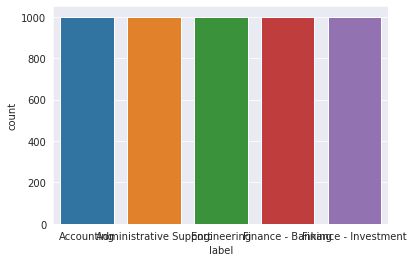

In [ ]:
sns.set_style('darkgrid')
sns.countplot(data=df, x=df["label"])

In [ ]:
# Due to long text colulmns names are not visible but it clearly shows that everything attribute has same frequency 
# It also shows that data is not imbalanced

In [ ]:
df['title']

0                       Loss Prevention Detective - Colma
1                              Loss Prevention Officer PM
2       P/T Special Investigations Unit Field Investig...
3                Loss Prevention/Hotel Security - On Call
4                    Loss Prevention Detective - Millbury
                              ...                        
4995                           Analyst, Investment Banker
4996    CIB - Investment Banking - Consumer & Retail C...
4997                                Sr. Financial Analyst
4998                                 Network Analyst (IT)
4999                                Compliance Analyst AR
Name: title, Length: 5000, dtype: object

In [ ]:
print("Number of unique values in title column", df['title'].nunique())

Number of unique values in title column 1811


In [ ]:
#Calculating characters in title
df['title_character_count'] = df["title"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))

In [ ]:
df['title_character_count']

0       29
1       23
2       50
3       35
4       32
        ..
4995    24
4996    60
4997    19
4998    18
4999    19
Name: title_character_count, Length: 5000, dtype: int64

In [ ]:
print("Average characters in title column " , int(df['title_character_count'].mean()))

Average characters in title column  25


In [ ]:
df['title']

0                       Loss Prevention Detective - Colma
1                              Loss Prevention Officer PM
2       P/T Special Investigations Unit Field Investig...
3                Loss Prevention/Hotel Security - On Call
4                    Loss Prevention Detective - Millbury
                              ...                        
4995                           Analyst, Investment Banker
4996    CIB - Investment Banking - Consumer & Retail C...
4997                                Sr. Financial Analyst
4998                                 Network Analyst (IT)
4999                                Compliance Analyst AR
Name: title, Length: 5000, dtype: object

In [ ]:
#top 10 titles 

In [ ]:
df['title'].value_counts().head(10)

Software Engineer                 163
Internal Auditor                  141
Receptionist                      141
Senior Internal Auditor           108
Investment Analyst                 63
Mechanical Engineer                59
Patient Account Representative     57
Accounting Intern                  54
Office Administrator               43
Quality Assurance Manager          34
Name: title, dtype: int64

In [ ]:
df['text'].nunique()

2807

In [ ]:
#There are about 8000 job descriptions which has same text 

In [ ]:
df['text_character_count'] = df["text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))

In [ ]:
df['text_character_count']

0       5256
1       3142
2       4028
3       1379
4       2620
        ... 
4995    2223
4996    2803
4997    5652
4998    2484
4999    4029
Name: text_character_count, Length: 5000, dtype: int64

In [ ]:
df.drop(['title_character_count', 'text_character_count'], inplace=True, axis=1)

##**Encoding the label features**

In [ ]:
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(df['label'])
df['label'] = encoded_label

##**Text Preprocessing:**
Removing stop words and applying stemming techniques.

In [ ]:
def rm_stop_word_portstemming(text_col):
    
    # convert to lowercase
    text = text_col.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return " ".join(words)
cleantext=[]
for item in tqdm(df['text']):
    words=rm_stop_word_portstemming(item)
    cleantext+=[words]
df['cleantext']=cleantext

100%|██████████| 5000/5000 [05:18<00:00, 15.70it/s]


In [ ]:
def rm_stop_word_portstemming(text_col):
    
    # convert to lowercase
    text = text_col.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return " ".join(words)
cleantext=[]
for item in tqdm(df['title']):
    words=rm_stop_word_portstemming(item)
    cleantext+=[words]
df['cleantitle']=cleantext

100%|██████████| 5000/5000 [00:03<00:00, 1321.28it/s]


In [ ]:
df

,text,title,label,cleantext,cleantitle
0,Search by Keyword More Options Search by Locat...,Loss Prevention Detective - Colma,0,search keyword option search locat clear load ...,loss prevent detect colma
1,Description At more than 80 award-winning prop...,Loss Prevention Officer PM,0,descript 80 award win properti worldwid ritz c...,loss prevent offic pm
2,COMPANY DESCRIPTION: Ethos Risk Services is a ...,P/T Special Investigations Unit Field Investig...,0,compani descript etho risk servic nation renow...,p special investig unit field investig siu
3,You’ve always been hyper alert to your surroun...,Loss Prevention/Hotel Security - On Call,0,alway hyper alert surround uncanni sens thing ...,loss prevent hotel secur call
4,Your surprise is waiting! Explore career oppor...,Loss Prevention Detective - Millbury,0,surpris wait explor career opportun marshal st...,loss prevent detect millburi
...,...,...,...,...,...
4995,Job Summary The Analyst position is responsibl...,"Analyst, Investment Banker",4,job summari analyst posit respons analyz struc...,analyst invest banker
4996,J.P. Morgan’s Corporate & Investment Bank is a...,CIB - Investment Banking - Consumer & Retail C...,4,j p morgan corpor invest bank global leader ac...,cib invest bank consum retail coverag 1st year...
4997,Position Title: Senior Financial Analyst What ...,Sr. Financial Analyst,4,posit titl senior financi analyst need senior ...,sr financi analyst
4998,Join a high performing team! BRBH is looking f...,Network Analyst (IT),4,join high perform team brbh look network analy...,network analyst


##**Converting text to numbers to feed them into Model**

In [ ]:
# TFidf vectorizer for text features
vectorizer            =  TfidfVectorizer()
tf_idf_features =  vectorizer.fit_transform(df['cleantext']).toarray()
tf_idf_features          = pd.DataFrame(tf_idf_features)


In [ ]:
# TFidf vectorizer for title features
vectorizer            =  TfidfVectorizer()
tf_idf_features2 =  vectorizer.fit_transform(df['cleantitle']).toarray()
tf_idf_features2          = pd.DataFrame(tf_idf_features2)


In [ ]:
#Concatenating all the features into one dataframe for flexibility and simplicity

df = pd.concat([df, tf_idf_features, tf_idf_features2], axis=1, join='inner')

In [ ]:
df

,text,title,label,cleantext,cleantitle,0,1,2,3,4,...,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195
0,Search by Keyword More Options Search by Locat...,Loss Prevention Detective - Colma,0,search keyword option search locat clear load ...,loss prevent detect colma,0.0,0.029486,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,Description At more than 80 award-winning prop...,Loss Prevention Officer PM,0,descript 80 award win properti worldwid ritz c...,loss prevent offic pm,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,COMPANY DESCRIPTION: Ethos Risk Services is a ...,P/T Special Investigations Unit Field Investig...,0,compani descript etho risk servic nation renow...,p special investig unit field investig siu,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,You’ve always been hyper alert to your surroun...,Loss Prevention/Hotel Security - On Call,0,alway hyper alert surround uncanni sens thing ...,loss prevent hotel secur call,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,Your surprise is waiting! Explore career oppor...,Loss Prevention Detective - Millbury,0,surpris wait explor career opportun marshal st...,loss prevent detect millburi,0.0,0.069415,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Job Summary The Analyst position is responsibl...,"Analyst, Investment Banker",4,job summari analyst posit respons analyz struc...,analyst invest banker,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4996,J.P. Morgan’s Corporate & Investment Bank is a...,CIB - Investment Banking - Consumer & Retail C...,4,j p morgan corpor invest bank global leader ac...,cib invest bank consum retail coverag 1st year...,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.357311,0.0,0.0,0.0
4997,Position Title: Senior Financial Analyst What ...,Sr. Financial Analyst,4,posit titl senior financi analyst need senior ...,sr financi analyst,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4998,Join a high performing team! BRBH is looking f...,Network Analyst (IT),4,join high perform team brbh look network analy...,network analyst,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


##**Splitting data in train and test**

In [ ]:
# Splitting into train and test datasets for training and evaluation
df.drop(["text", "title", 'cleantext', 'cleantitle', 'title_character_count'], axis=1, inplace=True)
y=df['label']
X_train, X_test, y_train, y_test = train_test_split( df, y, test_size=0.33, random_state=42)

In [ ]:
df

,label,0,1,2,3,4,5,6,7,8,...,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195
0,0,0.0,0.029486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0,0.0,0.069415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4996,4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.357311,0.0,0.0,0.0
4997,4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4998,4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


##**Creating a Naive Bayes Model Which is best suited for text classification tasks (e.g Spam classification, Movie review classification)** 

In [ ]:

model = MultinomialNB()
model.fit(X_train, y_train)
preds = model.predict(X_test)
# Printing accuracy score of the model
print("Accuracy: ", accuracy_score(y_test, preds))
# Classificaton report of the model
#Turning Numbers into Label for confusion matrix
preds_labeled = label_encoder.inverse_transform(preds)
y_test_labeled = label_encoder.inverse_transform(y_test)
print(classification_report(y_test_labeled, preds_labeled))
print("\n")
print("\n")
print("Confusion Matrix of Classification")
confusion_matrix(y_test_labeled, preds_labeled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Accuracy:  0.6963636363636364
                        precision    recall  f1-score   support

            Accounting       1.00      0.67      0.81       341
Administrative Support       0.98      0.97      0.97       342
           Engineering       0.98      0.97      0.98       327
     Finance - Banking       0.00      0.00      0.00       325
  Finance - Investment       0.43      0.86      0.57       315

              accuracy                           0.70      1650
             macro avg       0.68      0.69      0.66      1650
          weighted avg       0.68      0.70      0.67      1650





Confusion Matrix of Classification


array([[230,   7,   2,  78,  24],
       [  0, 331,   3,   2,   6],
       [  0,   1, 318,   1,   7],
       [  0,   0,   1,   0, 324],
       [  0,   0,   1,  44, 270]])

##**Visualizing confusion matrix with a heatmap**

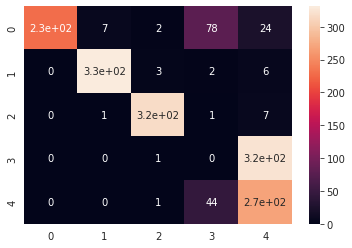

In [ ]:
#Confusion matrix of classification
sns.heatmap(confusion_matrix(y_test, preds), annot=True, )
plt.show()

##**Creating another model for comparison --GradientBoostingClassifier**

In [ ]:
# Support Vector Machine Classifier
XGBoost = GradientBoostingClassifier(n_estimators=5)
XGBoost.fit(X_train, y_train)
preds = XGBoost.predict(X_test)
# Printing accuracy score of the model
print("Accuracy: ", accuracy_score(y_test, preds))
# Classificaton report of the model
#Turning Numbers into Label for confusion matrix
preds_labeled = label_encoder.inverse_transform(preds)
y_test_labeled = label_encoder.inverse_transform(y_test)
print(classification_report(y_test_labeled, preds_labeled))
print("\n")
print("\n")
print("Confusion Matrix of Classification")
confusion_matrix(y_test_labeled, preds_labeled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Accuracy:  1.0
                        precision    recall  f1-score   support

            Accounting       1.00      1.00      1.00       341
Administrative Support       1.00      1.00      1.00       342
           Engineering       1.00      1.00      1.00       327
     Finance - Banking       1.00      1.00      1.00       325
  Finance - Investment       1.00      1.00      1.00       315

              accuracy                           1.00      1650
             macro avg       1.00      1.00      1.00      1650
          weighted avg       1.00      1.00      1.00      1650





Confusion Matrix of Classification


array([[341,   0,   0,   0,   0],
       [  0, 342,   0,   0,   0],
       [  0,   0, 327,   0,   0],
       [  0,   0,   0, 325,   0],
       [  0,   0,   0,   0, 315]])

##**Visualizing confusion matrix with a heatmap**

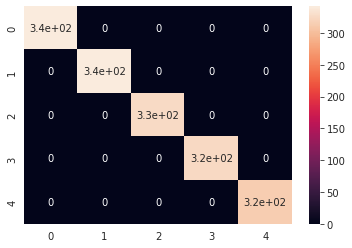

In [ ]:
#Confusion matrix of classification
sns.heatmap(confusion_matrix(y_test, preds), annot=True, )
plt.show()

##**Building a Deep Neural Network TensorFlow Model with hidden layers** 

In [ ]:
# Defining TensorFlow model with Sequential API
tf_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation="softmax")
])

#Compiling TensorFlow model with Adam optimizer and SparseCategoricalCrossentropy loss
tf_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#Training the Model and validating it 
# Running it only for 5 Epochs
tf_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
105/105 [==============================] - 4s 32ms/step - loss: 0.9560 - accuracy: 0.7451 - val_loss: 0.4471 - val_accuracy: 0.8200
Epoch 2/5
105/105 [==============================] - 3s 26ms/step - loss: 0.3152 - accuracy: 0.9093 - val_loss: 0.2964 - val_accuracy: 0.8879
Epoch 3/5
105/105 [==============================] - 2s 23ms/step - loss: 0.2047 - accuracy: 0.9513 - val_loss: 0.2549 - val_accuracy: 0.8945
Epoch 4/5
105/105 [==============================] - 3s 25ms/step - loss: 0.1389 - accuracy: 0.9842 - val_loss: 0.2267 - val_accuracy: 0.9030
Epoch 5/5
105/105 [==============================] - 3s 26ms/step - loss: 0.0921 - accuracy: 0.9940 - val_loss: 0.2073 - val_accuracy: 0.9139


In [ ]:
tf_preds = tf_model.predict(X_test)

In [ ]:
tf_preds = np.array([np.argmax(i) for i in tf_preds])

In [ ]:

#Turning Numbers into Label for confusion matrix
preds_labeled = label_encoder.inverse_transform(preds)
y_test_labeled = label_encoder.inverse_transform(y_test)
print(classification_report(y_test_labeled, preds_labeled))
print("\n")
print("\n")
print("Confusion Matrix of Classification")
confusion_matrix(y_test_labeled, preds_labeled)

                        precision    recall  f1-score   support

            Accounting       1.00      1.00      1.00       341
Administrative Support       1.00      1.00      1.00       342
           Engineering       1.00      1.00      1.00       327
     Finance - Banking       1.00      1.00      1.00       325
  Finance - Investment       1.00      1.00      1.00       315

              accuracy                           1.00      1650
             macro avg       1.00      1.00      1.00      1650
          weighted avg       1.00      1.00      1.00      1650





Confusion Matrix of Classification


array([[341,   0,   0,   0,   0],
       [  0, 342,   0,   0,   0],
       [  0,   0, 327,   0,   0],
       [  0,   0,   0, 325,   0],
       [  0,   0,   0,   0, 315]])

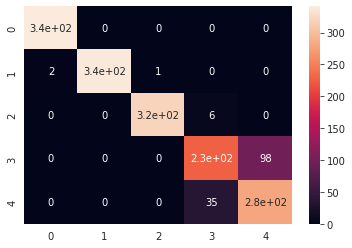

In [ ]:
#Confusion matrix of classification
sns.heatmap(confusion_matrix(y_test, tf_preds), annot=True, )
plt.show()

##**Comparing Results of Models**

**Report**

**First Model**

Naive Bayes Model:
> Accuracy: 70%  

> Precision: 68%

> Recall: 69%

> F1-Score: 76%


**2nd Model**

XGBoost Model:
> Accuracy: 100%  

> Precision: 100% 

> Recall: 100% 

> F1-Score:100% 


**3rd Model**

DNN Model:
> Accuracy: 100%   

> Precision: 100% 

> Recall: 100% 

> F1-Score: 100% 

From the above metrics we can notice that 2nd two Models are performing very well with good accuracy score and F1-Score.


##Note:
**1:** Dataset is very large and while processing it runs of out RAM so we tried to load a small set of data to train the model. If there is enough computationl resourse available then Models can be trained on entire corpus.
Accuracy will not that good because we are using only small amount of corpora.

**2:**
 Evaluation metrics can be changed whenever Notebook is ran. So results are reproducible.